## Ref :

- https://www.kaggle.com/c/web-traffic-time-series-forecasting
- https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration

In [1]:
import numpy as np
import pandas as pd 
import datetime as dt
import time
import math 
import re
import matplotlib.pylab as plt

## 0) Get data

In [2]:
train = pd.read_csv('train_1.csv').fillna(0)


In [3]:
print ( 'number of rows : ', len(train))
print ( 'number of columns : ', len(train.columns))

number of rows :  145063
number of columns :  551


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [5]:
# misssing value 

#len(df.isnull())
#len(df[df.isnull().any(1)])
#len(df(df['2015-07-01'].isnull()))
#df['2015-07-01'].isnull().value_counts()

In [6]:
train.head(3)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0


In [7]:
#mystring = '2NE1_zh.wikipedia.org_all-access_spider'
#res = re.search('[a-z][a-z].wikipedia.org',mystring)
#type(res)
#res.group(0)[:2]
#list(res)

## 1) Data Pre-process

### 1-1) Get page language 

In [8]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        """
         ----- fix here for python 3 ----#
        https://stackoverflow.com/questions/18493677/how-do-i-return-a-string-from-a-regex-match-in-python
        """
        return res.group(0)[:2]
    return 'na'

train['lang'] = train.Page.map(get_language)

#from collections import Counter
#print(Counter(train.lang))

en    24108
ja    20431
de    18547
na    17855
fr    17802
zh    17229
ru    15022
es    14069
Name: lang, dtype: int64

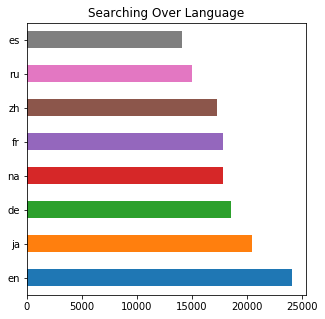

In [9]:
fig = plt.figure(1,figsize=[5,5])
train.lang.value_counts().plot(kind='barh')
plt.title('Searching Over Language')
train.lang.value_counts()

In [10]:
lang_sets = {}     # get the search data without language column 
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}         # avg daily searching (for each language )
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,550,551
index,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,63,15,26,14,20,22,19,18,20,zh


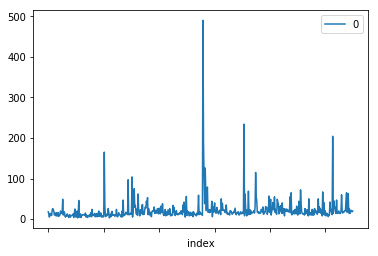

In [11]:
train.iloc[0]\
  .fillna(0)\
  .reset_index()\
  .set_index('index')\
  .iloc[1:-1,:].plot()  # remove language column 

    
    
train.iloc[0]\
  .fillna(0)\
  .reset_index().T

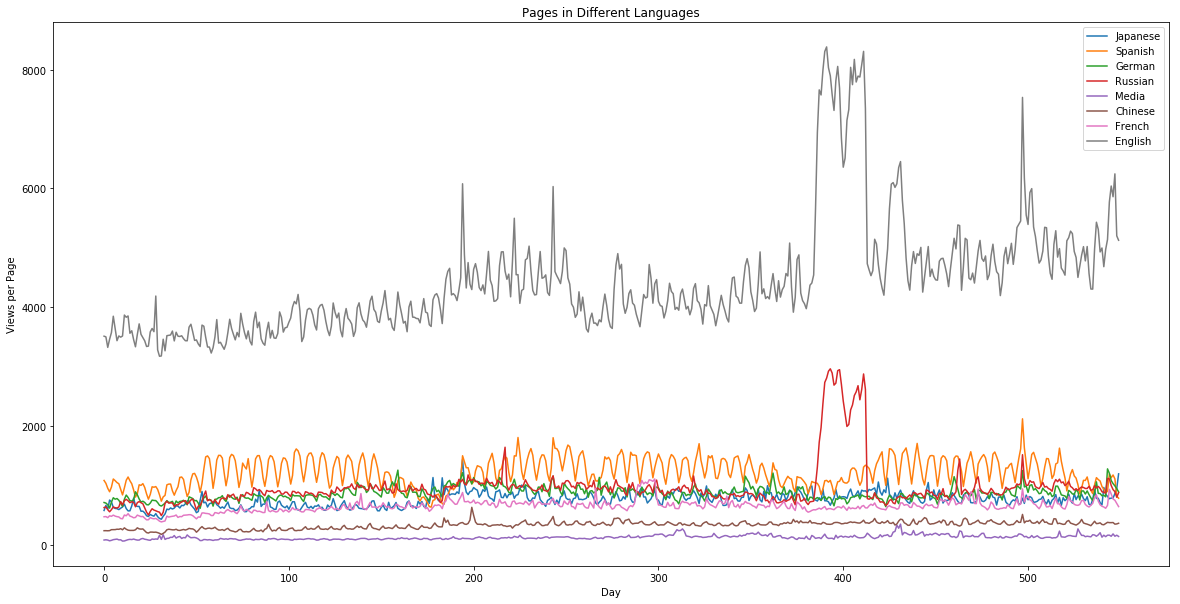

In [12]:
# plot over langauge searching 

days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[20,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

### 1-2)  Fast Fourier Transform (FFT)

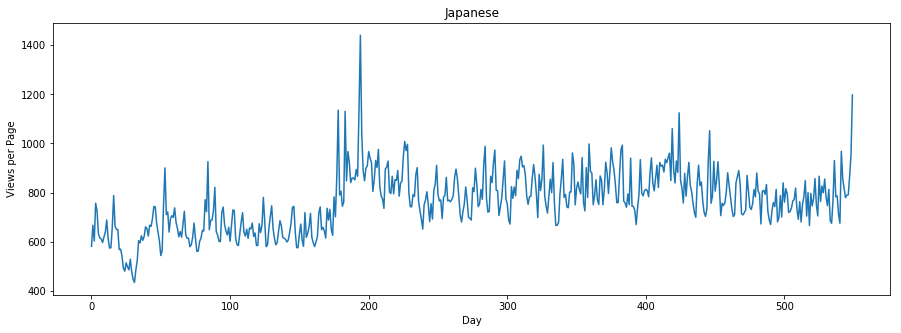

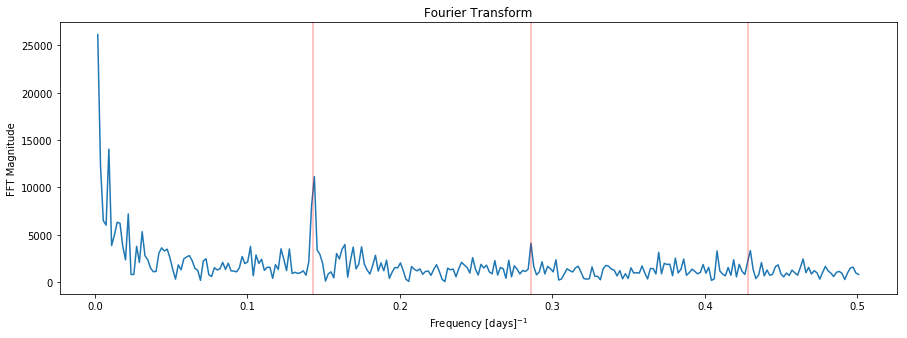

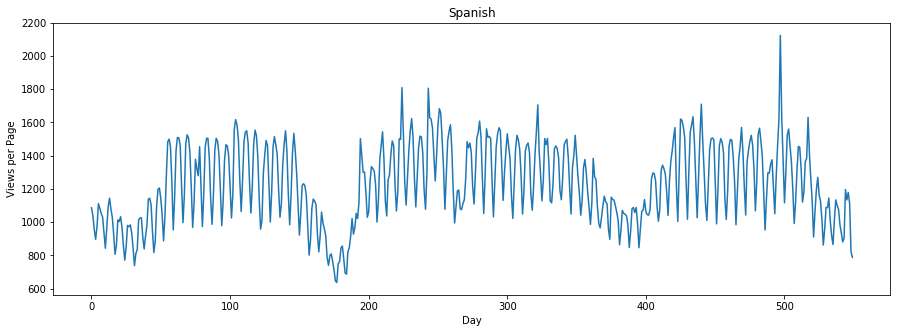

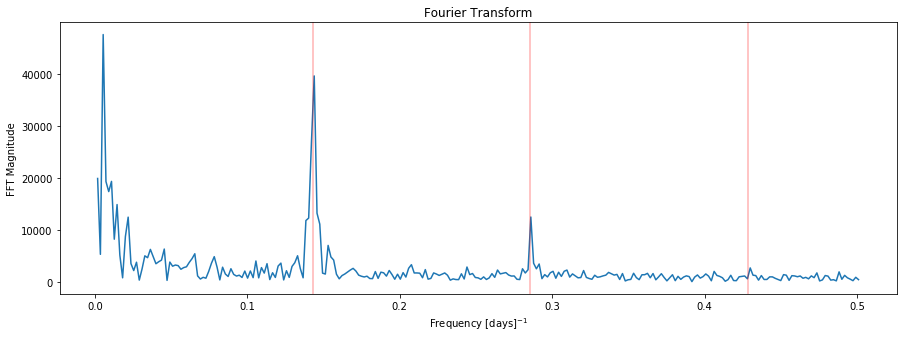

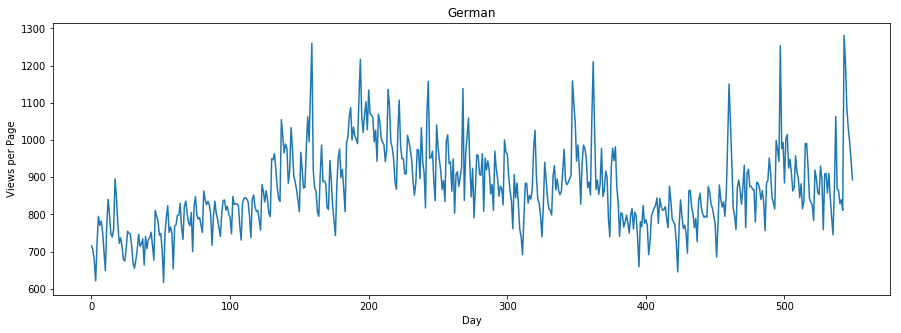

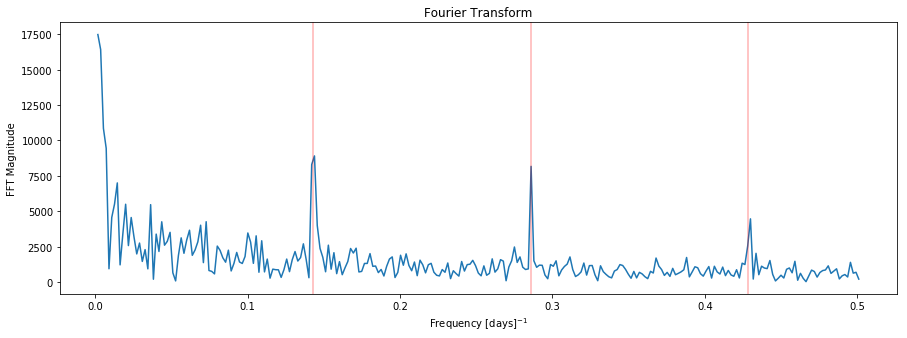

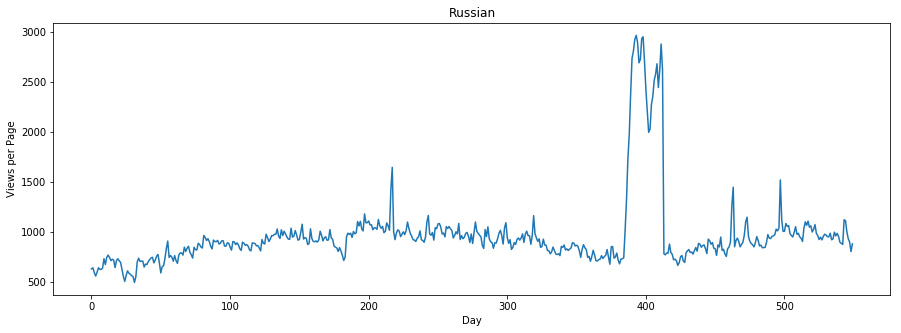

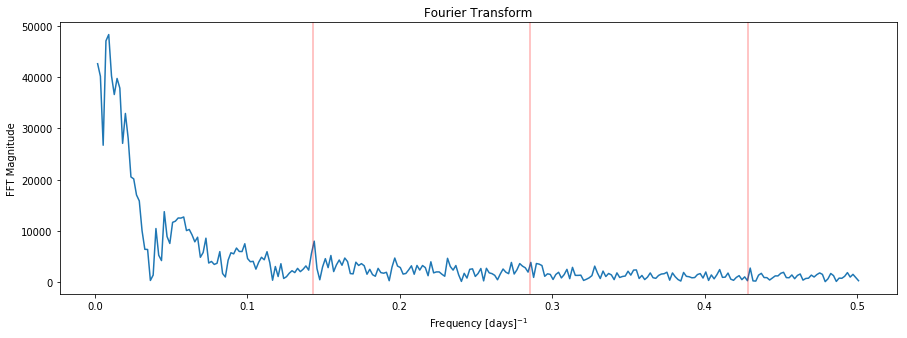

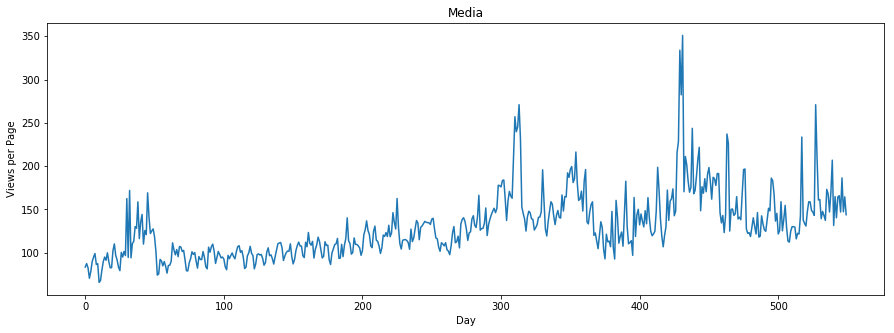

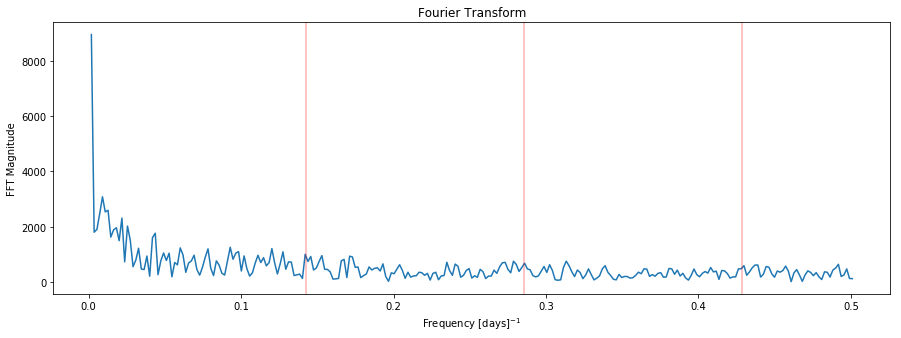

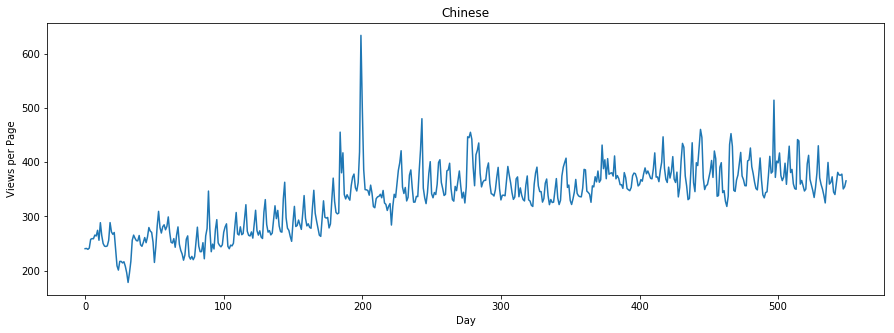

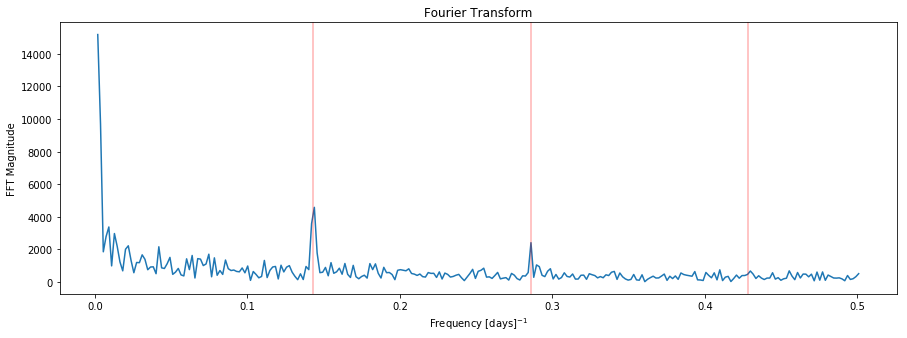

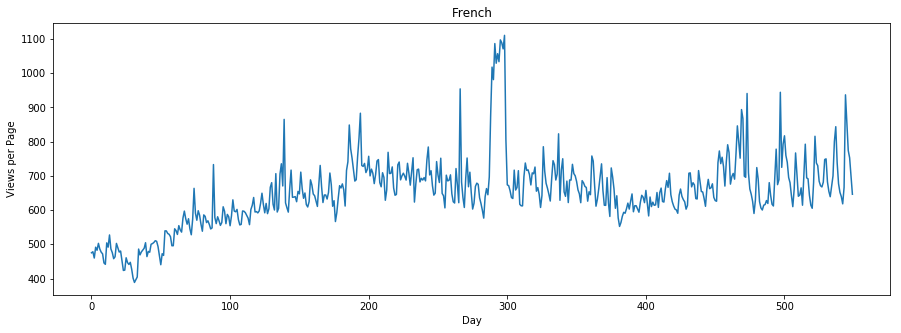

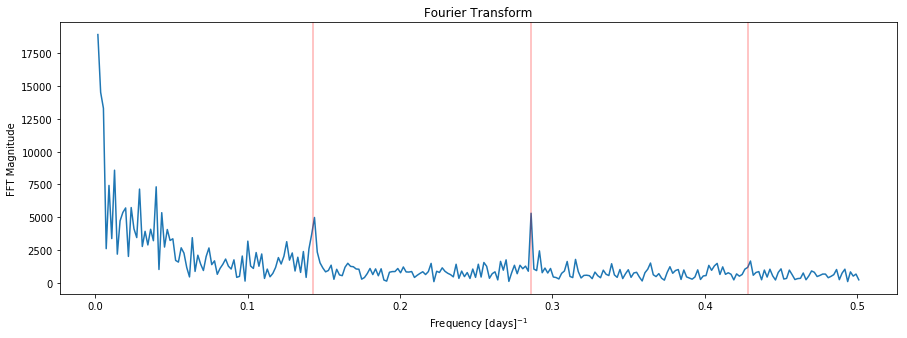

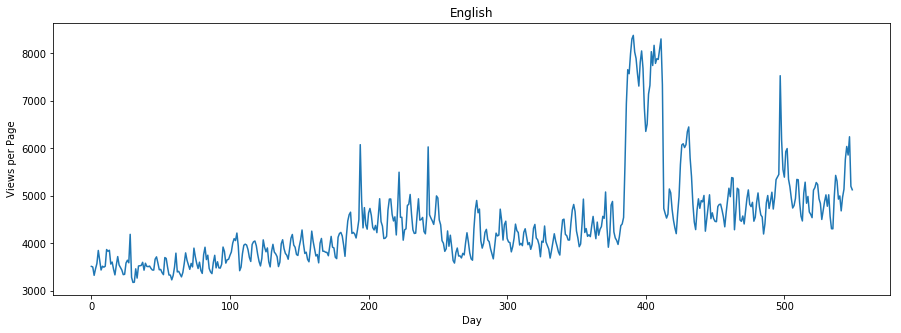

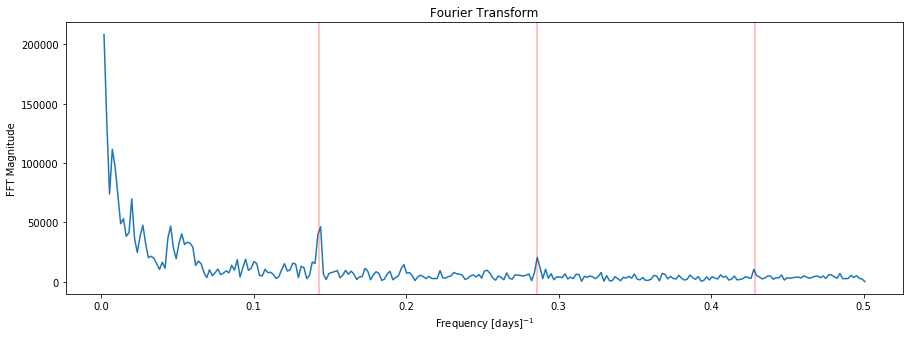

In [13]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

for key in sums:
    plot_with_fft(key)

## 2) Aanalysis

### 2-1) Individual  Data

In [14]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx],0])
    
    plt.show()

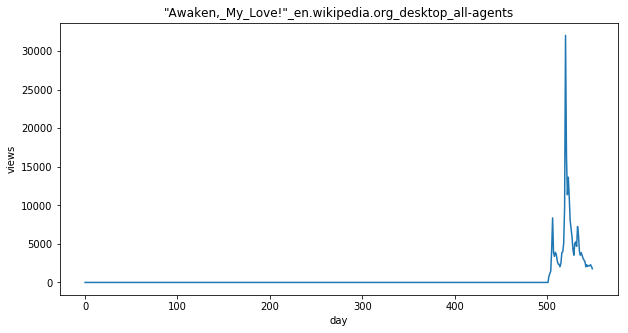

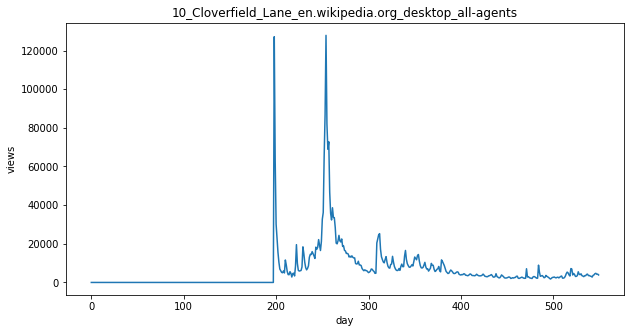

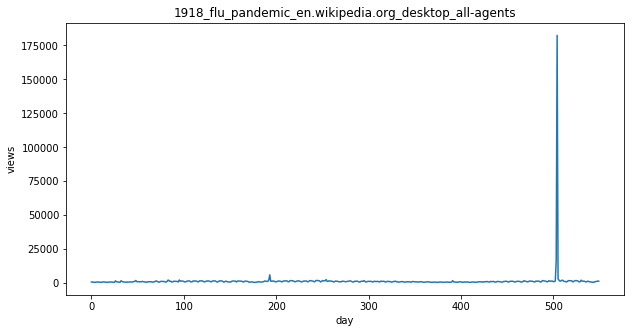

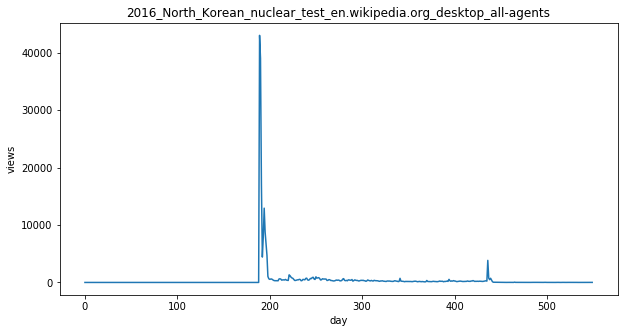

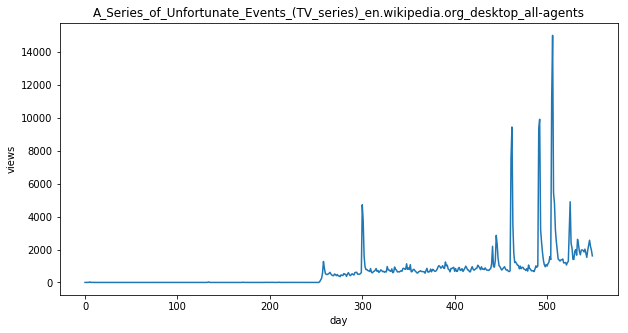

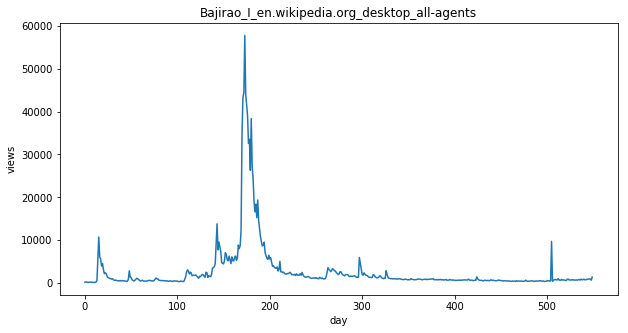

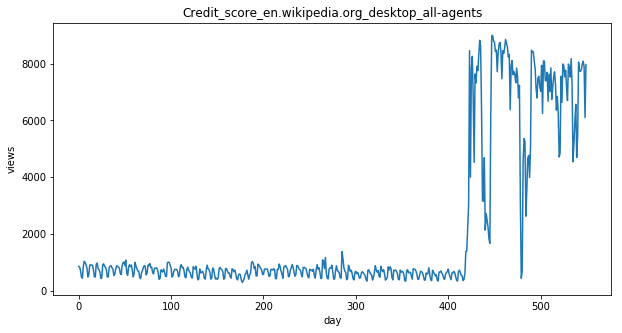

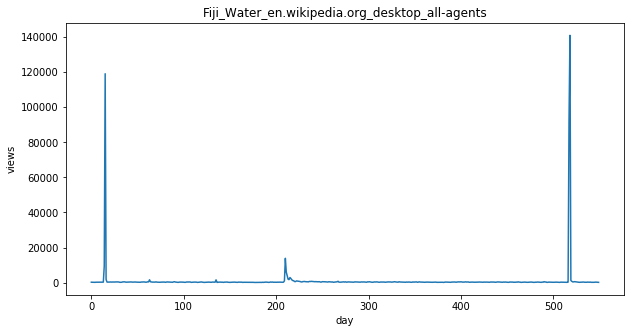

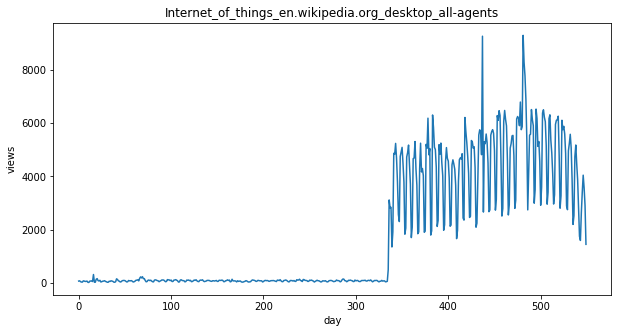

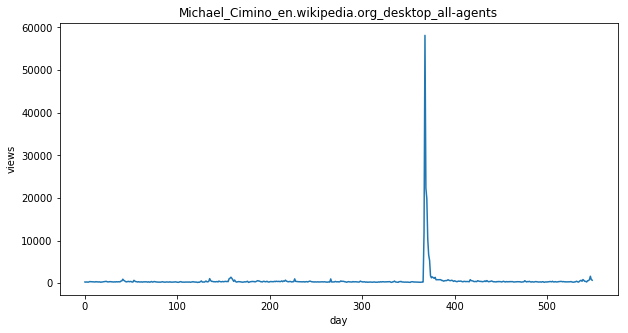

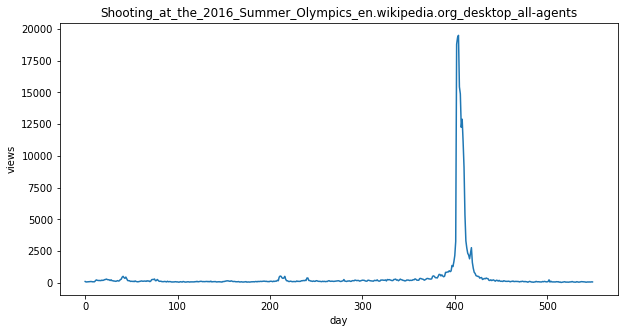

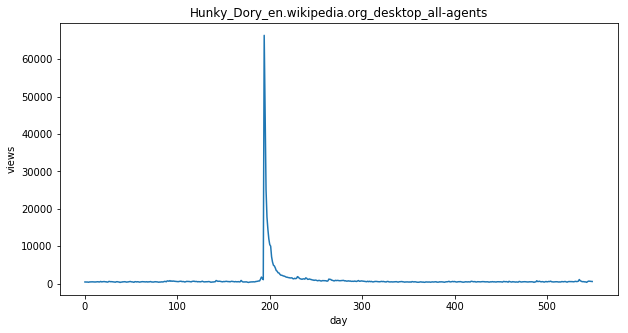

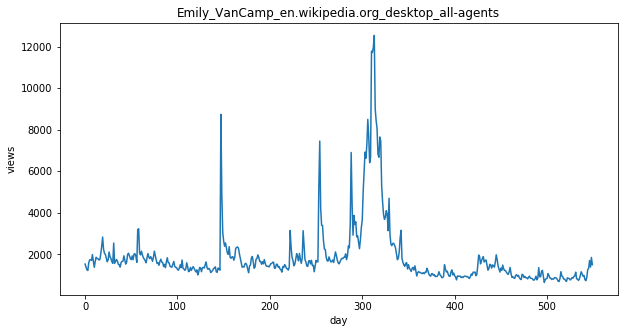

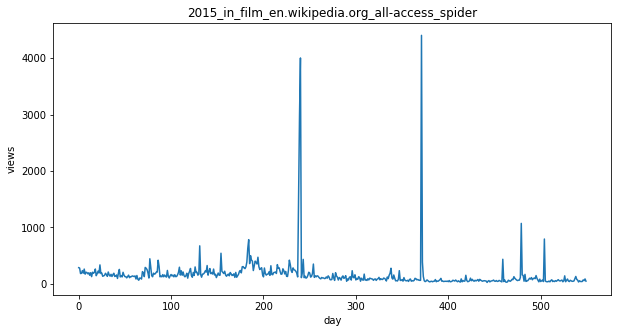

In [15]:
# english page 


idx = [1, 5, 10, 50, 100, 250,500, 750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('en',i)

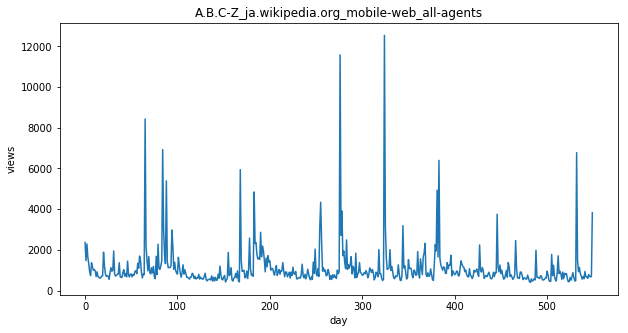

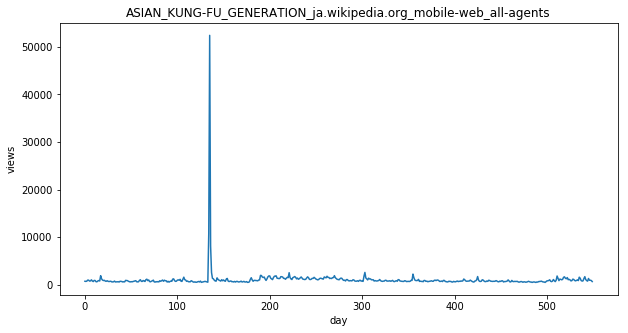

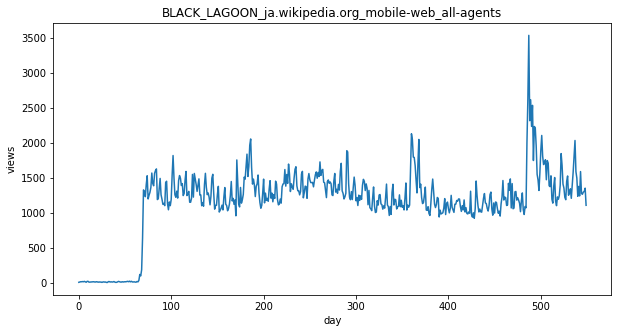

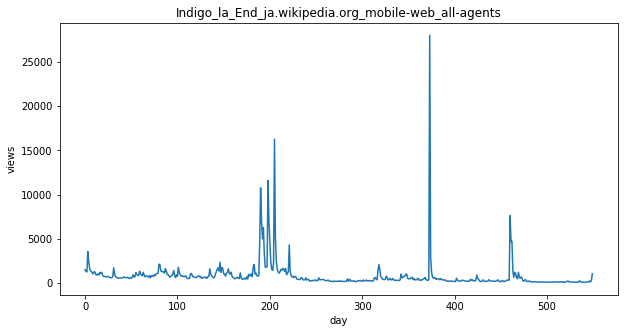

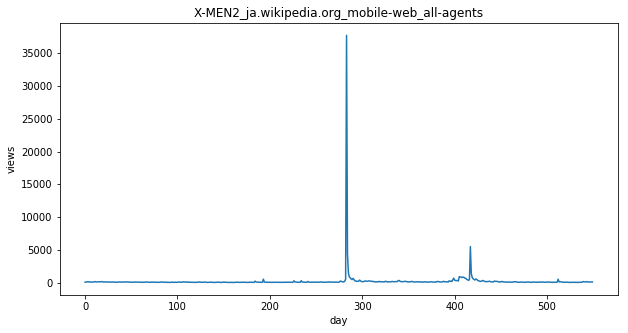

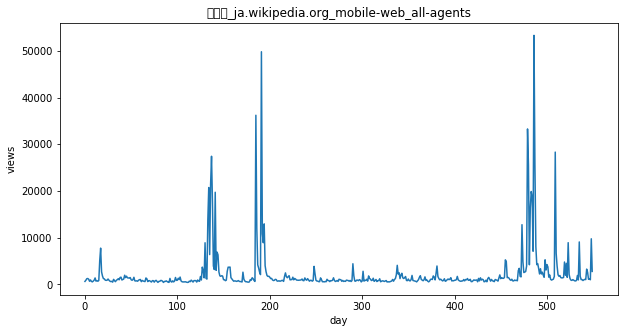

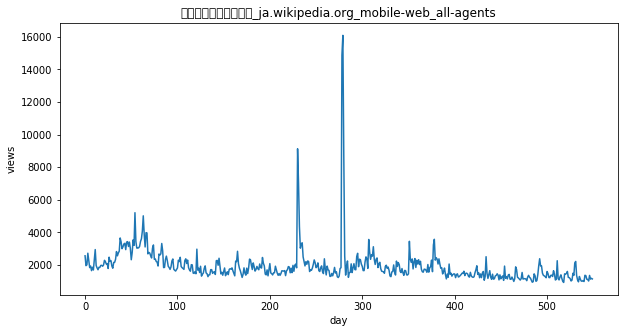

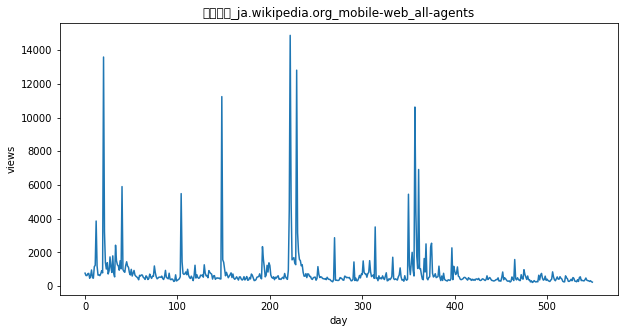

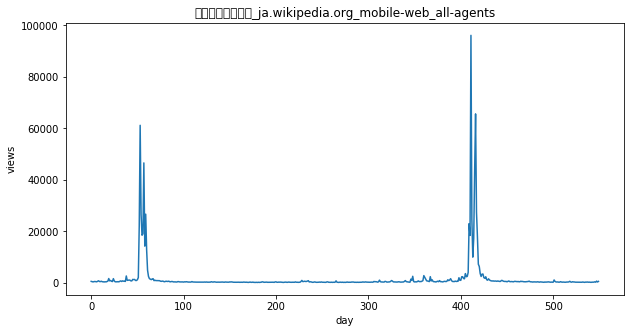

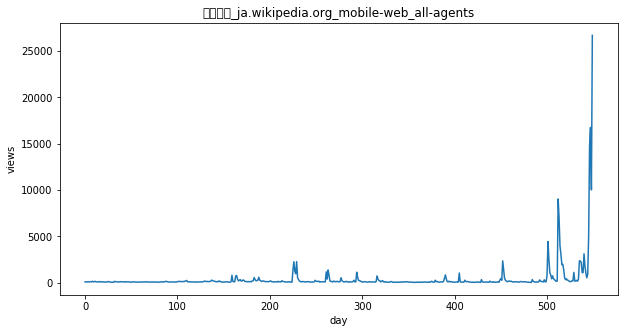

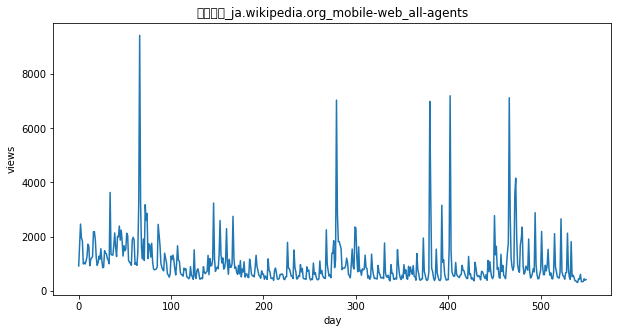

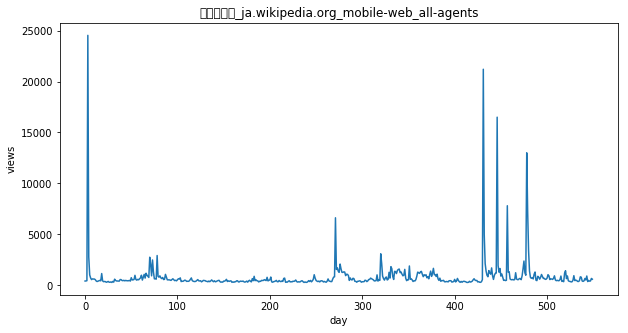

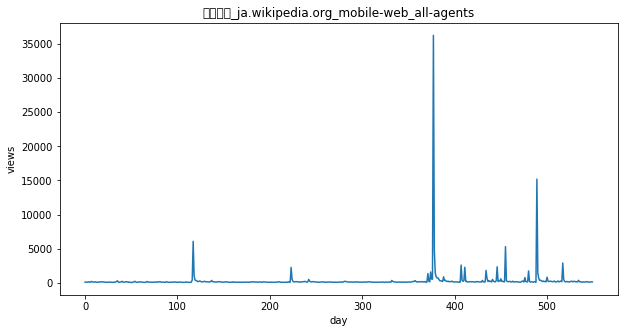

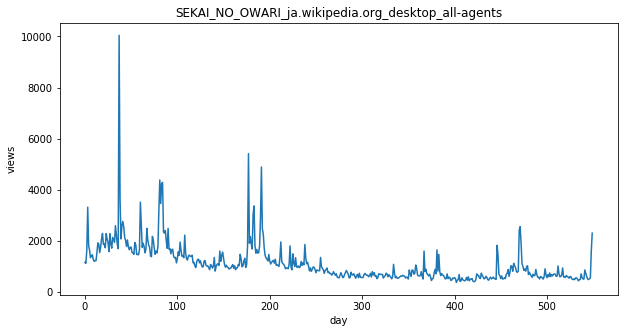

In [16]:
# japan page 


idx = [1, 5, 10, 50, 100, 250,500, 750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('ja',i)

## 3) Aggregated data 